![LL%20&%20SU.jpg](attachment:LL%20&%20SU.jpg)

# Module 7: Data Visualization, Exploration, and Communication

# Plotting and Visualization

In [ ]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [ ]:
# %matplotlib notebook

## A Brief matplotlib API Primer

Making plots and static or interactive visualizations is one of the most important tasks
in data analysis. It may be a part of the exploratory process; for example, helping identify
outliers, needed data transformations, or coming up with ideas for models.

Python has many visualization tools (see the end of
this chapter), but I’ll be mainly focused on matplotlib (http://matplotlib.sourceforge.net).
matplotlib is a (primarily 2D) desktop plotting package designed for creating publication-
quality plots. The project was started by John Hunter in 2002 to enable a MATLAB-
like plotting interface in Python. 

matplotlib has a number of add-on toolkits, such as mplot3d for 3D plots and basemap
for mapping and projections

Matplotlib API functions like plot and
close are all in the matplotlib.pyplot module, which is typically imported by convention
as:

In [1]:
import matplotlib.pyplot as plt

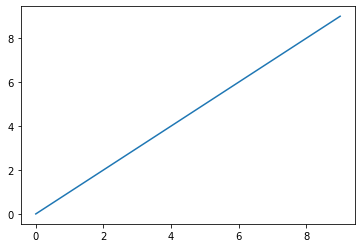

In [3]:
import numpy as np
data = np.arange(10)
data
plt.plot(data)

### Figures and Subplots

Plots in matplotlib reside within a Figure object. You can create a new figure with
plt.figure:

In [5]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

If you are in pylab mode in IPython, a new empty window should pop up. plt.fig
ure has a number of options, notably figsize will guarantee the figure has a certain size
and aspect ratio if saved to disk. Figures in matplotlib also support a numbering scheme
(for example, plt.figure(2)) that mimics MATLAB. You can get a reference to the
active figure using plt.gcf().

You can’t make a plot with a blank figure. You have to create one or more subplots
using add_subplot

In [6]:
ax1 = fig.add_subplot(2, 2, 1)

This means that the figure should be 2 × 2, and we’re selecting the first of 4 subplots
(numbered from 1).

In [7]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

When you issue a plotting command like plt.plot([1.5, 3.5, -2, 1.6]), matplotlib
draws on the last figure and subplot used (creating one if necessary), thus hiding the
figure and subplot creation.

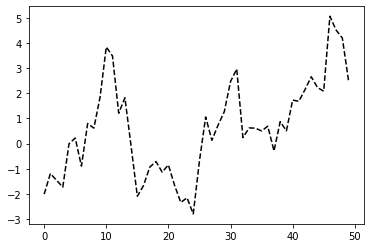

In [8]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

The 'k--' is a style option instructing matplotlib to plot a black dashed line. The objects
returned by fig.add_subplot above are AxesSubplot objects, on which you can directly
plot on the other empty subplots by calling each one’s instance methods

In [9]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

In [10]:
plt.close('all')

Since creating a figure with multiple subplots according to a particular layout is such
a common task, there is a convenience method, plt.subplots, that creates a new figure
and returns a NumPy array containing the created subplot objects

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f424093d978>,
      dtype=object)

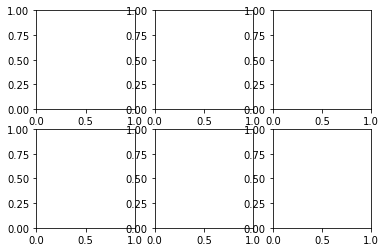

In [11]:
fig, axes = plt.subplots(2, 3)
axes

#### Adjusting the spacing around subplots

By default matplotlib leaves a certain amount of padding around the outside of the
subplots and spacing between subplots. This spacing is all specified relative to the
height and width of the plot, so that if you resize the plot either programmatically or
manually using the GUI window, the plot will dynamically adjust itself. The spacing
can be most easily changed using the subplots_adjust Figure method, also available as
a top-level function:

subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

wspace and hspace controls the percent of the figure width and figure height, respectively,
to use as spacing between subplots

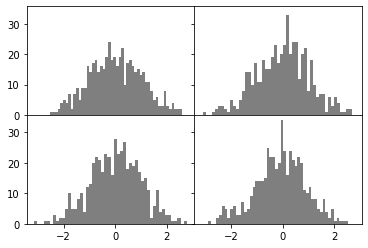

In [12]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Styles

ax.plot(x, y, 'g--')

ax.plot(x, y, linestyle='--', color='g')

In [13]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Line plots can additionally have markers to highlight the actual data points. Since matplotlib
creates a continuous line plot, interpolating between points, it can occasionally
be unclear where the points lie.

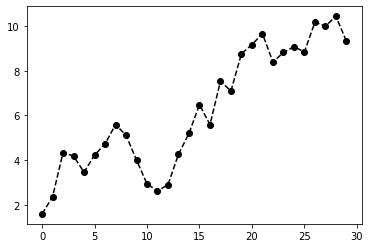

In [14]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--')

This could also have been written more explicitly as:

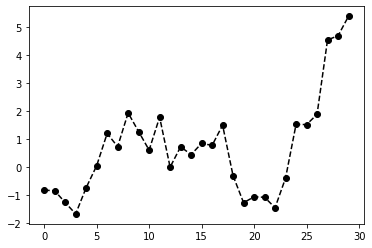

In [15]:
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

In [ ]:
plt.close('all')

For line plots, you will notice that subsequent points are linearly interpolated by default.
This can be altered with the drawstyle option

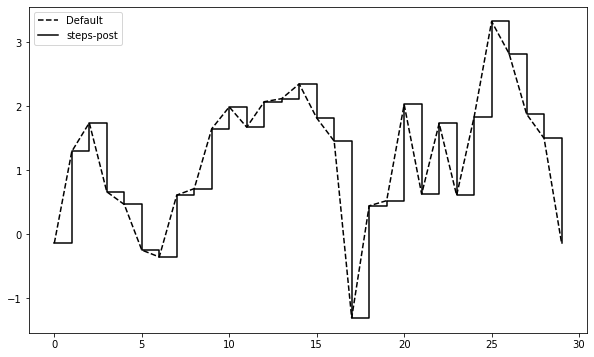

In [ ]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

### Ticks, Labels, and Legends

For most kinds of plot decorations, there are two main ways to do things: using the
procedural pyplot interface (which will be very familiar to MATLAB users) and the
more object-oriented native matplotlib API

The pyplot interface, designed for interactive use, consists of methods like xlim,
xticks, and xticklabels. These control the plot range, tick locations, and tick labels,
respectively.



#### Setting the title, axis labels, ticks, and ticklabels

To illustrate customizing the axes, I’ll create a simple figure and plot of a random walk

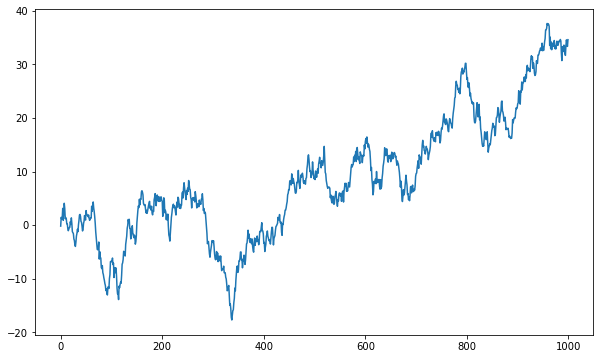

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

To change the X axis ticks, it’s easiest to use set_xticks and set_xticklabels. The
former instructs matplotlib where to place the ticks along the data range; by default
these locations will also be the labels

In [ ]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

Lastly, set_xlabel gives a name to the X axis and set_title the subplot title:

In [ ]:
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

Text(0.5, 3.200000000000003, 'Stages')

props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)

#### Adding legends

Legends are another critical element for identifying plot elements. There are a couple
of ways to add one. The easiest is to pass the label argument when adding each piece
of the plot

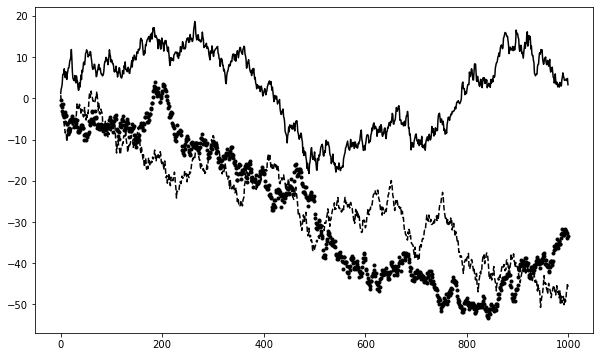

In [ ]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

Once you’ve done this, you can either call ax.legend() or plt.legend() to automatically
create a legend. If you aren’t picky 'best' is a good option, as it will choose a location that is most out of the way.

In [ ]:
ax.legend(loc='best')

### Annotations and Drawing on a Subplot

Annotations can draw both text and arrows arranged appropriately. As an example,
let’s plot the closing S&P 500 index price since 2007 (obtained from Yahoo! Finance)
and annotate it with some of the important dates from the 2008-2009 financial crisis.

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

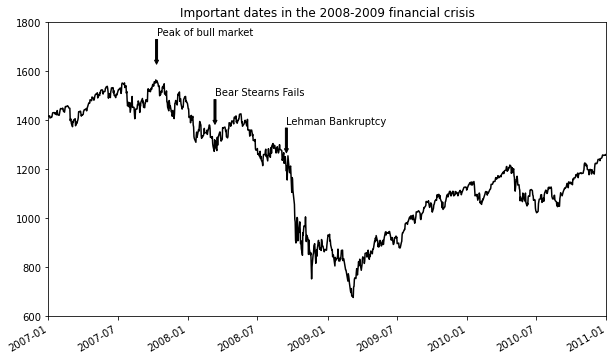

In [ ]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

In [ ]:
ax.set_title('Important dates in the 2008–2009 financial crisis')

Drawing shapes requires some more care. matplotlib has objects that represent many
common shapes, referred to as patches. Some of these, like Rectangle and Circle are
found in matplotlib.pyplot, but the full set is located in matplotlib.patches.

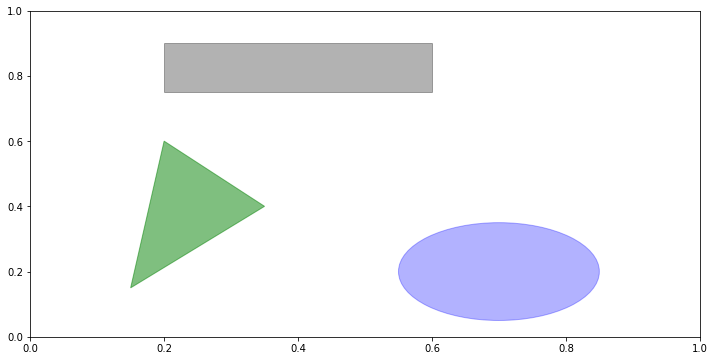

In [ ]:
fig = plt.figure(figsize=(12, 6)); ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving Plots to File

The active figure can be saved to file using plt.savefig. This method is equivalent to
the figure object’s savefig instance method. The file type is inferred from the file extension. 

There are a couple of important options that I use frequently for publishing
graphics: dpi, which controls the dots-per-inch resolution, and bbox_inches, which can
trim the whitespace around the actual figure. As in thw second cell below:

### If you want to test the save feature change the following cell types from markdown to code

plt.savefig('figpath.svg')

plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

## Plotting with pandas and seaborn

### Line Plots

As you’ve seen, matplotlib is actually a fairly low-level tool. You assemble a plot from
its base components: the data display (the type of plot: line, bar, box, scatter, contour,
etc.), legend, title, tick labels, and other annotations. Part of the reason for this is that
in many cases the data needed to make a complete plot is spread across many objects.
In pandas we have row labels, column labels, and possibly grouping information.

In [ ]:
plt.close('all')

Series and DataFrame each have a plot method for making many different plot types.

<AxesSubplot:>

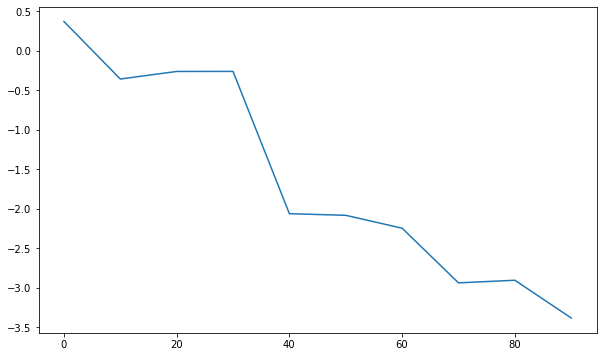

In [ ]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

DataFrame’s plot method plots each of its columns as a different line on the same
subplot

<AxesSubplot:>

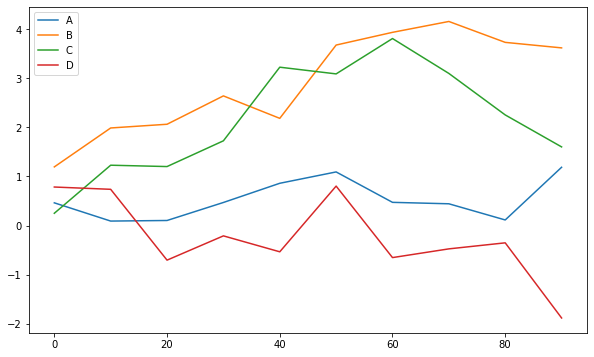

In [ ]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

### Bar Plots

Making bar plots instead of line plots is a simple as passing kind='bar' (for vertical
bars) or kind='barh' (for horizontal bars). In this case, the Series or DataFrame index
will be used as the X (bar) or Y (barh) ticks

<AxesSubplot:>

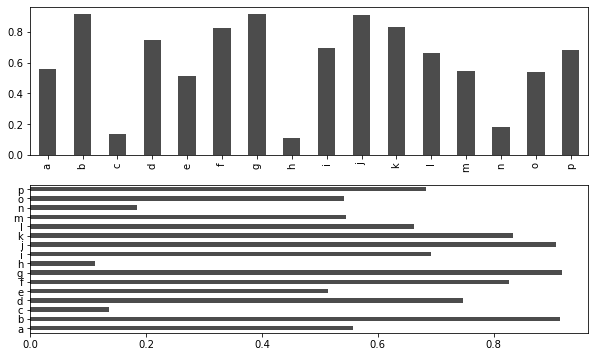

In [ ]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7) #X ticks case
data.plot.barh(ax=axes[1], color='k', alpha=0.7) #Y ticks case

In [ ]:
np.random.seed(12348)

With a DataFrame, bar plots group the values in each row together in a group in bars,
side by side

In [ ]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.370670,0.602792,0.229159,0.486744
two,0.420082,0.571653,0.049024,0.880592
three,0.814568,0.277160,0.880316,0.431326
four,0.374020,0.899420,0.460304,0.100843
five,0.433270,0.125107,0.494675,0.961825
six,0.601648,0.478576,0.205690,0.560547


<AxesSubplot:>

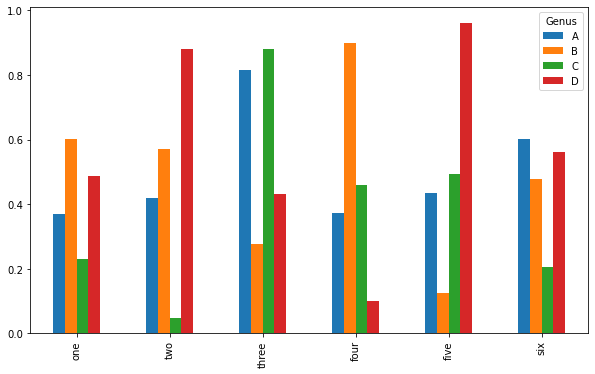

In [ ]:
df.plot.bar()

Note that the name “Genus” on the DataFrame’s columns is used to title the legend.

Stacked bar plots are created from a DataFrame by passing stacked=True, resulting in
the value in each row being stacked together

In [ ]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

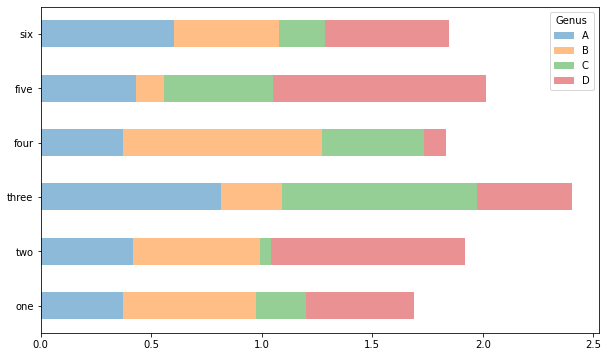

In [ ]:
df.plot.barh(stacked=True, alpha=0.5)

In [ ]:
plt.close('all')

Suppose we wanted to make a stacked bar plot showing the percentage of data points for each party size on each
day. 

I load the tip.csv data using read_csv and make a cross-tabulation by day and party size:

In [ ]:
tips = pd.read_csv('examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [ ]:
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]

Then, normalize so that each row sums to 1

In [ ]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<AxesSubplot:xlabel='day'>

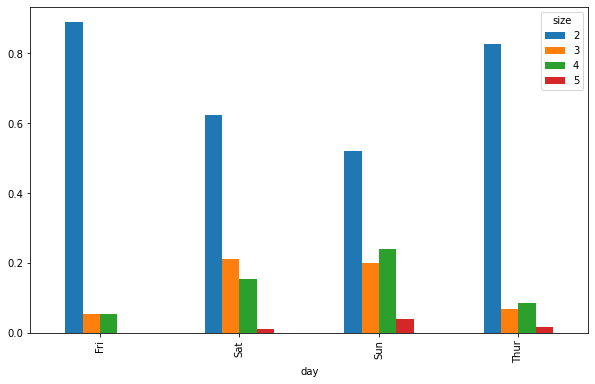

In [ ]:
party_pcts.plot.bar()

In [ ]:
plt.close('all')

### Histograms and Density Plots

A histogram, with which you may be well-acquainted, is a kind of bar plot that gives a
discretized display of value frequency. The data points are split into discrete, evenly
spaced bins, and the number of data points in each bin is plotted. Using the tipping
data from before, we can make a histogram of tip percentages of the total bill using the
hist method on the Series

In [ ]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()


,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


In [ ]:
# sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

In [ ]:
# plt.close('all')

In [ ]:
# sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [ ]:
# plt.close('all')

In [ ]:
sns.set(style="whitegrid")

In [ ]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<AxesSubplot:ylabel='Frequency'>

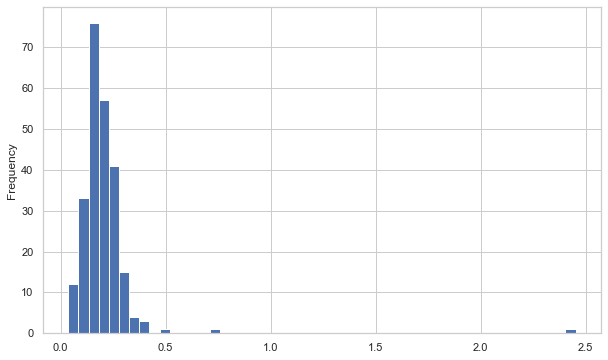

In [ ]:
tips['tip_pct'].plot.hist(bins=50)

A related plot type is a density plot, which is formed by computing an estimate of a
continuous probability distribution that might have generated the observed data. A
usual procedure is to approximate this distribution as a mixture of kernels, that is,
simpler distributions like the normal (Gaussian) distribution. Thus, density plots are
also known as KDE (kernel density estimate) plots. Using plot with kind='kde' makes
a density plot using the standard mixture-of-normals KDE

In [ ]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<AxesSubplot:ylabel='Density'>

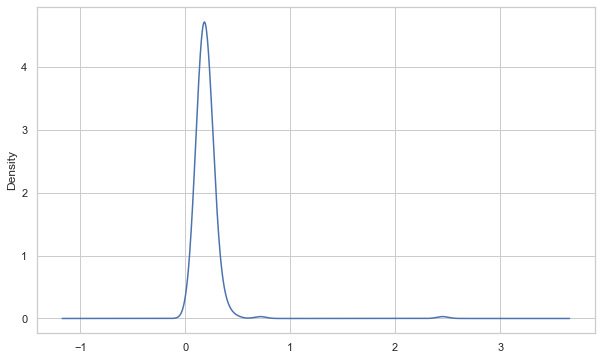

In [ ]:
tips['tip_pct'].plot.density()

These two plot types are often plotted together; the histogram in normalized form (to
give a binned density) with a kernel density estimate plotted on top. As an example,
consider a bimodal distribution consisting of draws from two different standard normal
distributions

In [ ]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

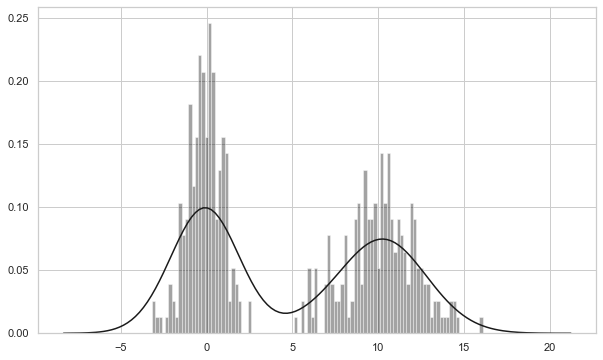

In [ ]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

### Scatter or Point Plots

Scatter plots are a useful way of examining the relationship between two one-dimensional
data series.

In [ ]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In [ ]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

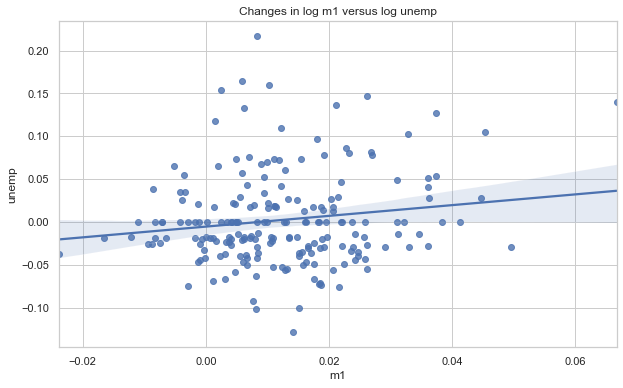

In [ ]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

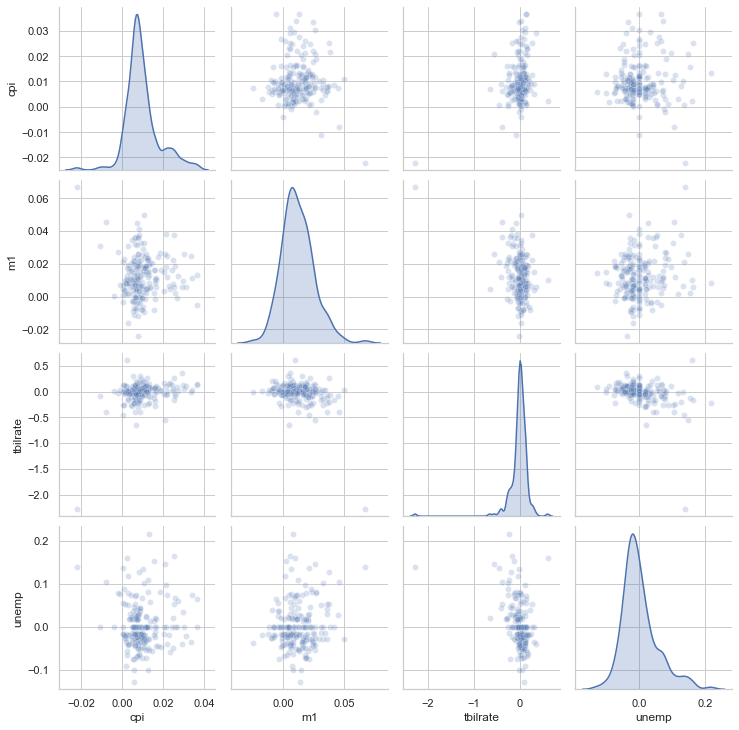

In [ ]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

### Facet Grids and Categorical Data

In [ ]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

In [ ]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

In [ ]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])